In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from scipy.stats import *
seed = np.random.seed(0)

# Experiments

In [72]:
# synthetical data, should be measured by experiments

n1, n2 = 500, 100
pop1 = norm.rvs(loc=5,  scale=1, size=n1, random_state=seed)
pop2 = lognorm.rvs(loc=4.5,  scale=1, s=0.5, size=n2, random_state=seed) # flawed experiment

np.median(pop1), np.median(pop2)

(4.9645683756350545, 5.605054429231201)

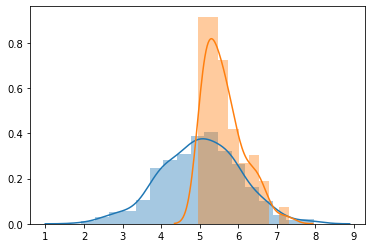

In [58]:
sb.distplot(pop1)
sb.distplot(pop2)

In [39]:
# we fit the data

mu1, s1 = norm.fit(pop1)
mu2, s2 = norm.fit(pop2)

print('{:.3f} +- {:.3f}'.format(mu1, s1))
print('{:.3f} +- {:.3f}'.format(mu2, s2))

5.010 +- 0.989
5.659 +- 0.592


In [43]:
# we calculate the posterior distribution parameters
# std

tau0 = np.sqrt(((1/s1**2) + (n2/s2**2))**(-1))
tau0

0.05909637215744083

In [45]:
# mean

th0 = tau0 * tau0 * ( (mu1/s1**2) + (n2*mu2/s2**2) )
th0

5.656796233816163

In [59]:
# parameters

print('{:.3f} +- {:.3f}'.format(th0, tau0))

5.657 +- 0.059


# Posterior distribution

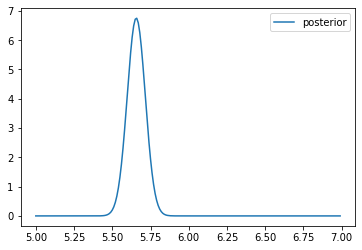

In [60]:
x = np.arange(5, 7, 0.01)
y = norm.pdf(x, loc=th0, scale=tau0)
plt.plot(x, y, label='posterior')
plt.legend()

# Use above results as prior for another measurement

In [90]:
# another experiment 

n3 = 1000
pop3 = norm.rvs(loc=5.5,  scale=0.5, size=n3, random_state=seed)

np.median(pop3)

5.493464821406992

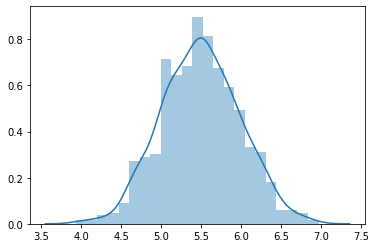

In [91]:
sb.distplot(pop3)

In [92]:
#fit it

mu3, s3 = norm.fit(pop3)

print('{:.3f} +- {:.3f}'.format(mu3, s3))

5.493 +- 0.487


In [93]:
# from prior
print('{:.3f} +- {:.3f}'.format(th0, tau0))

5.657 +- 0.059


In [94]:
# calculate new posterior parameters
# std

tau3 = np.sqrt(((1/tau0**2) + (n3/s3**2))**(-1))
tau3

0.014912211797965771

In [95]:
# mean
th3 = tau3 * tau3 * ( (th0/tau0**2) + (n3*mu3/s3**2) )
th3

5.503529498015487

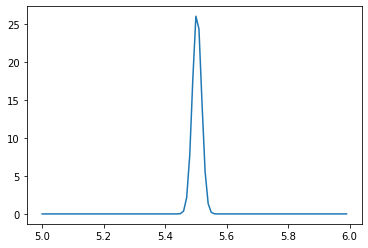

In [96]:
# posterior distribution

x = np.arange(5, 6, 0.01)
y = norm.pdf(x, loc=th3, scale=tau3)
plt.plot(x, y)

In [97]:
# posterior

print('{:.3f} +- {:.3f}'.format(th3, tau3))

5.504 +- 0.015


# Pipeline for multiple measurements

In [173]:
experiments = [
    (100, 5.5, 1.2),
    (100, 5.3, 1.1),
    (250, 5.8, 1.8),
    (300, 5.6, 1.5),
    (1000, 5.5, 1.0),
    (1000, 5.4, 0.7),
    (1500, 5.3, 0.3),
    (2000, 5.2, 0.2)
]

def calculate_posterior(prior, data):
    dummy, tau0, th0 = prior
    n, mu, sigma = data
    
    cur_tau = np.sqrt(((1/tau0**2) + (n/sigma**2))**(-1))
    cur_theta = cur_tau * cur_tau * ( (th0/tau0**2) + (n*mu/sigma**2) )
    return (dummy, cur_tau, cur_theta)

In [174]:
cur_res = None
res_dev = []

for item, data in enumerate(experiments):
    if item < 1:
        continue
    if cur_res == None:
        cur_res = calculate_posterior(experiments[item], data)
    else:
        cur_res = calculate_posterior(cur_res, data)
    res_dev.append(cur_res)

res_dev = np.array(res_dev)[:,1:]

Text(0, 0.5, 'mu with errors')

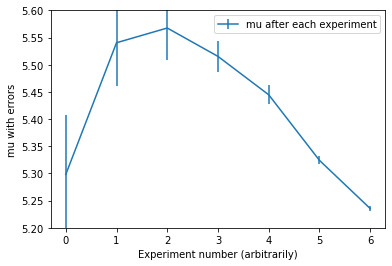

In [175]:
plt.errorbar(list(range(len(res_dev[:,1]))), res_dev[:,1], yerr=res_dev[:,0], label='mu after each experiment')
plt.ylim([5.2, 5.6])
plt.legend()
plt.xlabel('Experiment number (arbitrarily)')
plt.ylabel('mu with errors')

In [176]:
# weighted mu
# Bayes provides smaller constraints on the parameters

_mu, _sigma = np.array(experiments)[:,1], np.array(experiments)[:,2]

np.mean((_mu/(_sigma)**2) / (1/_sigma)**2), np.sqrt(np.mean( 1 / (1/_sigma)**2))

(5.449999999999999, 1.104536101718726)

# Bayes Classifier

In [ ]:
# to be continued, create a class